### Imports

In [2]:
#!/bin/sh source /Users/themagician/miniforge3/bin/activate /Users/themagician/py-venv/kaggle-venv/env
#!/bin/sh kaggle datasets download -d teejmahal20/airline-passenger-satisfaction

In [3]:
try:
    from google.colab import drive

    drive.mount('/content/drive')
    data_path = '/content/drive/MyDrive/Colab Notebooks/AI_Project/Python_Files/Data/'

    !pip install ipympl

    from google.colab import output
    output.enable_custom_widget_manager()

except:
    data_path = 'Data/'



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import ipympl

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

%matplotlib widget
#np.set_printoptions(precision=4)

# Credit Card Data

## Data cleaning and preparation

### Exploratory analysis

In [5]:
customers_df = pd.read_csv(data_path + "Credit_Card_Customer_Data.csv")
customers_df

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2                    1                    3                 4  
3                    1                    1                 4  
4                    0                   12                 3  
..                 ...                  ...               ...  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2  

[660 rows x 7 columns]

### Variables description

- `SI_no` (Customer Serial Identification Number): Serves purpose of indexing values.
- `Customer Key`: customer key.
- `Avg_Credit_Limit`: average credit card limit for the customer.
- `Total_Credit_Cards`: total credit cards owned by the customer.
- `Total_visits_bank`: total number of bank visits by the customer.
- `Total_visits_online`: total visits online by the bank customer.
- `Total_calls_made`: total calls made by the customer to the bank.

> Given that `SI_no` and `Customer Key` are indexing variables, we can safely drop them for the purpose of performing a clustering analysis.

---

How do I __automate__ this? If a variable is not needed, I need a routine to automatically recognize that this is the case and pass its column label to a `drop`.


### Data Cleaning

Dropping unecessary variables.

In [6]:
customers_df.drop(["Sl_No", "Customer Key"], axis=1, inplace= True)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [7]:
customers_df.describe()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000         10.000000

---

Are the descriptions of each variables interesting or unnecessary?

I can assume one of these two options:

1. The user is not interested in the dataset and in the features, _only in the __clustering__ output_.
2. The user is interested in the dataset: the dashboard therefore can contain a section in which there is a description of each variable. 
    - This description can either be graphical, statistical, or both.
    - It should occupy just a small share of the dashboard.

## PCA

### 2D

> Scaling features is not required, as `sklearn` implementation of the algorithm already takes care of the matter.

In [8]:
pca_2d = PCA(n_components = 2)

pca_2d.fit(customers_df)

PCA(n_components=2)

In [9]:
pca_2d.explained_variance_ratio_.sum()

0.999999995371773

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


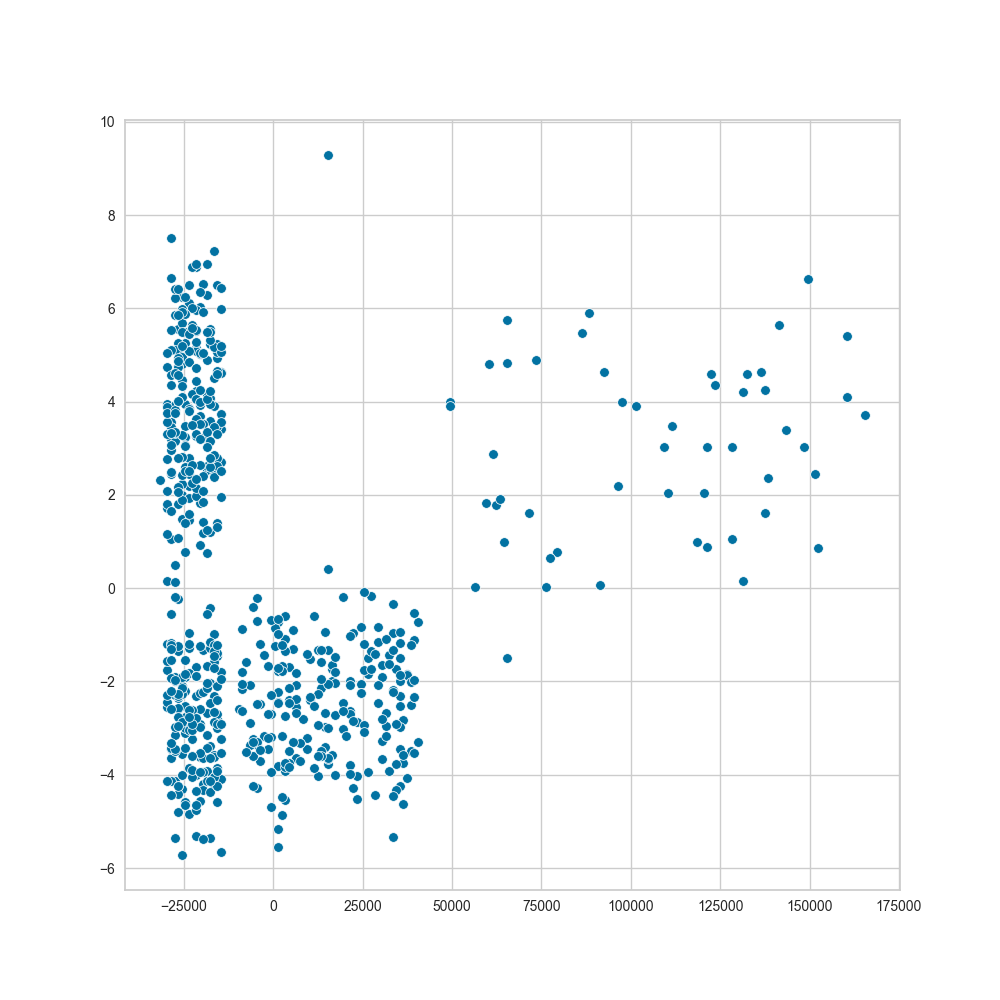

In [10]:
df_reduced_2d = pca_2d.transform(customers_df)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(x = df_reduced_2d[:, 0], y = df_reduced_2d[:, 1]) ;

### 3D

In [11]:
pca_3d = PCA(n_components = 3)

pca_3d.fit(customers_df)

PCA(n_components=3)

In [12]:
pca_3d.explained_variance_ratio_.sum()

0.9999999980168444

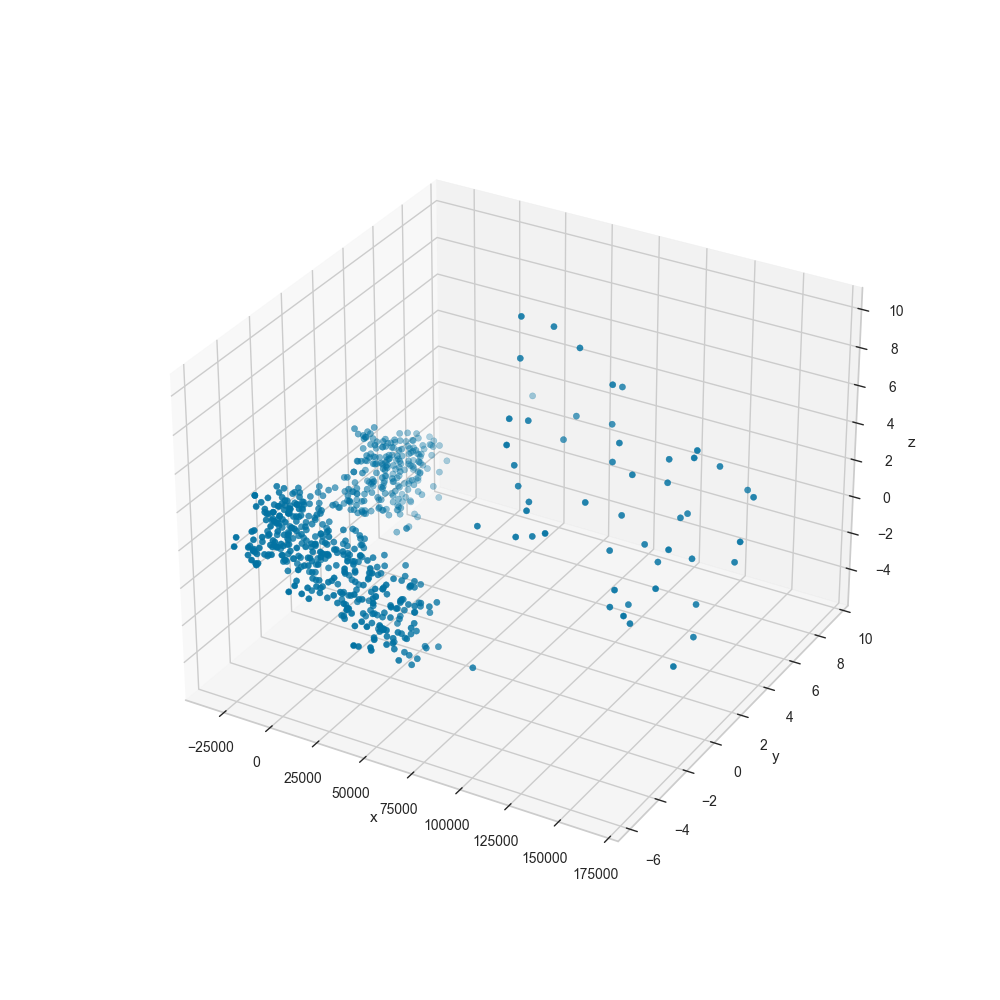

In [13]:
plt.ioff()
df_reduced_3d = pca_3d.transform(customers_df)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111, projection = '3d')

x = df_reduced_3d[:, 0]
y = df_reduced_3d[:, 1]
z = df_reduced_3d[:, 2]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z)

plt.show()


---

Interesting enough, an additional dimension does not add insight: instead, it confounds the visualization, making the clusters less visible. In 2D I can discern at least 4 if not 5 clusters (this result can be confirmed later, answering the question "Which is the best $K$?"): in 3D, the situation is less clear. This is confirmed by [`Fundamentals of data visualization`](https://clauswilke.com/dataviz/no-3d.html).

__TL;DR: even if it looks cool, do not go 3D.__

## K-Means

First step, scaling data.

In [14]:
df_reduced_3d = RobustScaler().fit_transform(df_reduced_3d)

---

Remember to add an explanation: _why did you choose this particular scaler_?

Moreover, the following sections are just playing with different choices of $K$. There are two possible options:

- Suggest the best $K$ as per the _Elbow Method_ but allow the user to play with different K.
  - This fits particularly well with the dashboard visualization of $K_n$, which is the $K$-th abstract _mean_ customer. The user can visualize the result of its choice by comparing the characteristics of these customers.
  - Howerer, limits must be applied to ensure that the dashboard does not broke and is responsive enough. A mix of limits and warnings should do?
- Stick with the best $K$ and use that as the only available learned model in the clustering.

## $K = 3$

In [15]:
km_3 = KMeans(
    n_clusters=3,
    n_init = 'auto',
    random_state = 19
)

km_3.fit(
    df_reduced_3d,
)


KMeans(n_clusters=3, n_init='auto', random_state=19)

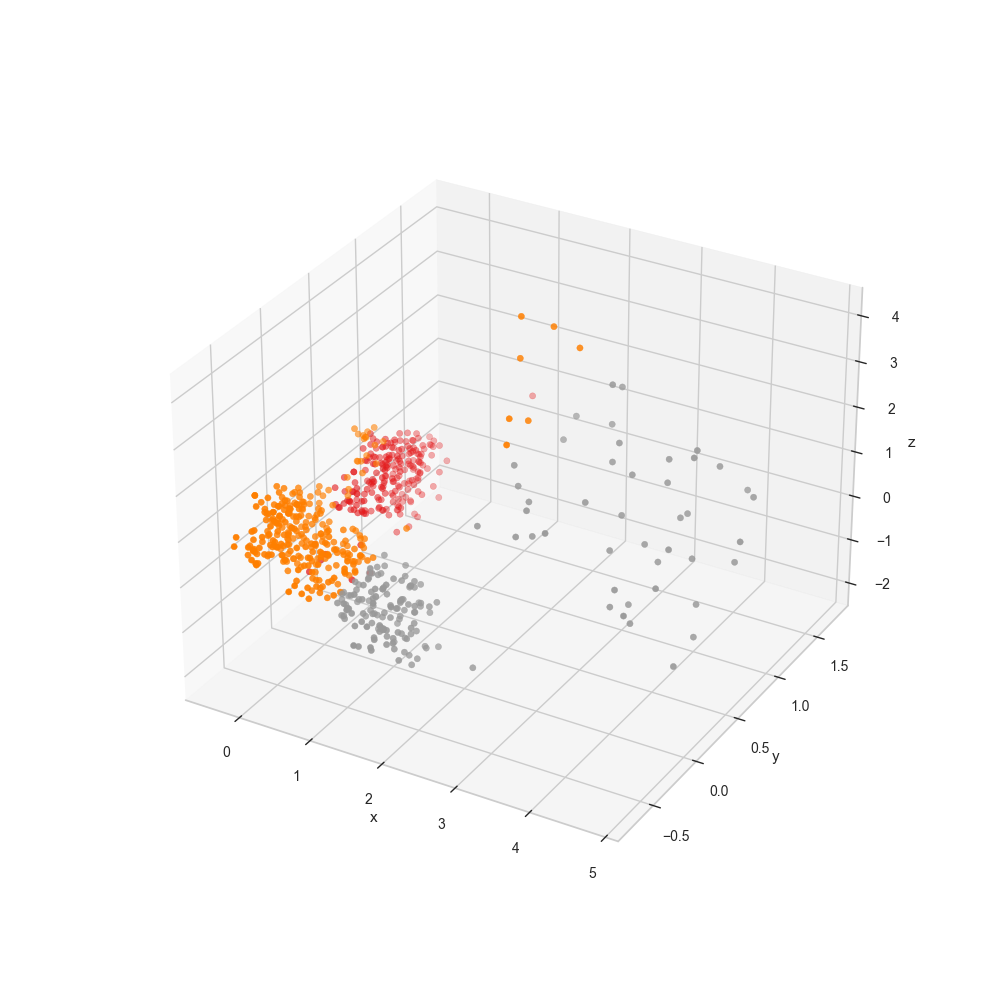

In [16]:
plt.ioff()
y_km_3 = km_3.predict(df_reduced_3d)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111, projection = '3d')

x = df_reduced_3d[:, 0]
y = df_reduced_3d[:, 1]
z = df_reduced_3d[:, 2]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z, c = y_km_3, cmap = 'Set1')


plt.show()

## $K = 4$

In [17]:
km_4 = KMeans(
    n_clusters = 4,
    n_init = 'auto',
    random_state = 19
)

km_4.fit(
    df_reduced_3d,
)


KMeans(n_clusters=4, n_init='auto', random_state=19)

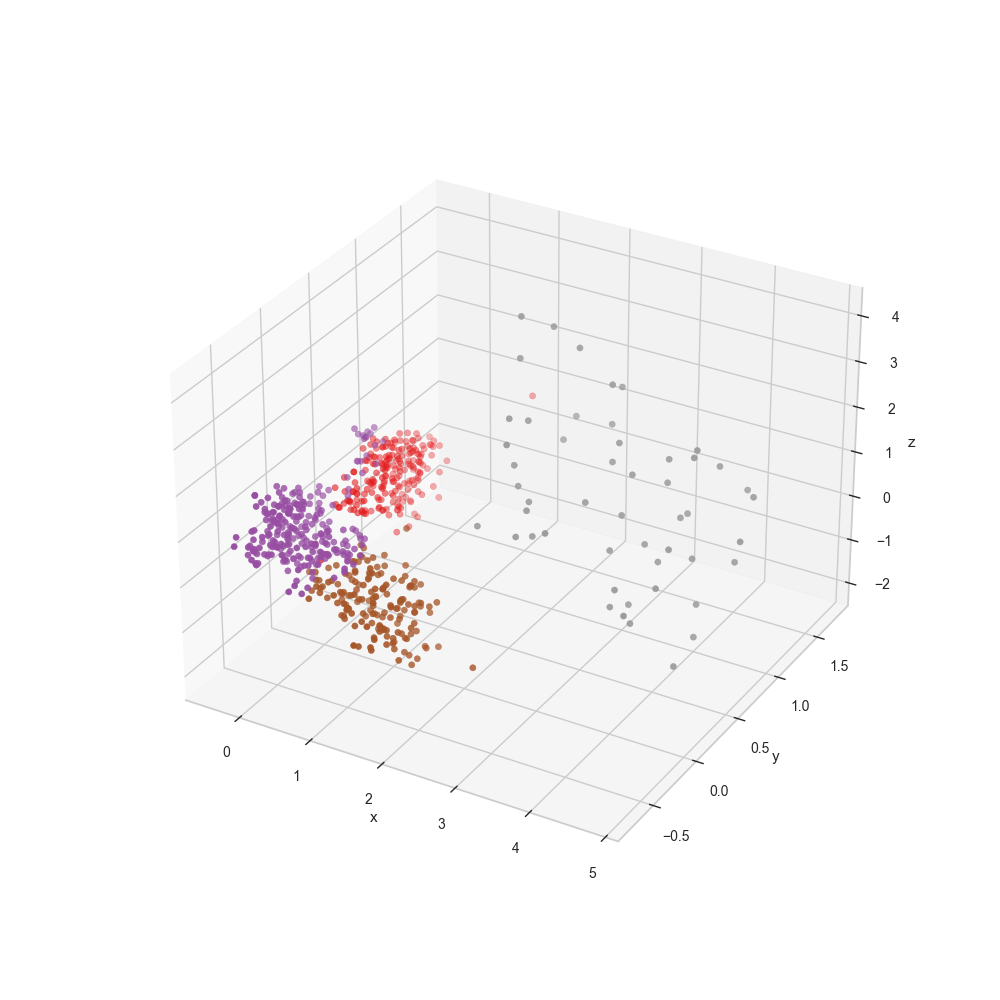

In [18]:
plt.ioff()
y_km_4 = km_4.predict(df_reduced_3d)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111, projection = '3d')

x = df_reduced_3d[:, 0]
y = df_reduced_3d[:, 1]
z = df_reduced_3d[:, 2]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z, c = y_km_4, cmap = 'Set1')


plt.show()

## $K = 5$

In [19]:
km_5 = KMeans(
    n_clusters=5,
    n_init = 'auto',
    random_state = 19
)

km_5.fit(
    df_reduced_3d,
)


KMeans(n_clusters=5, n_init='auto', random_state=19)

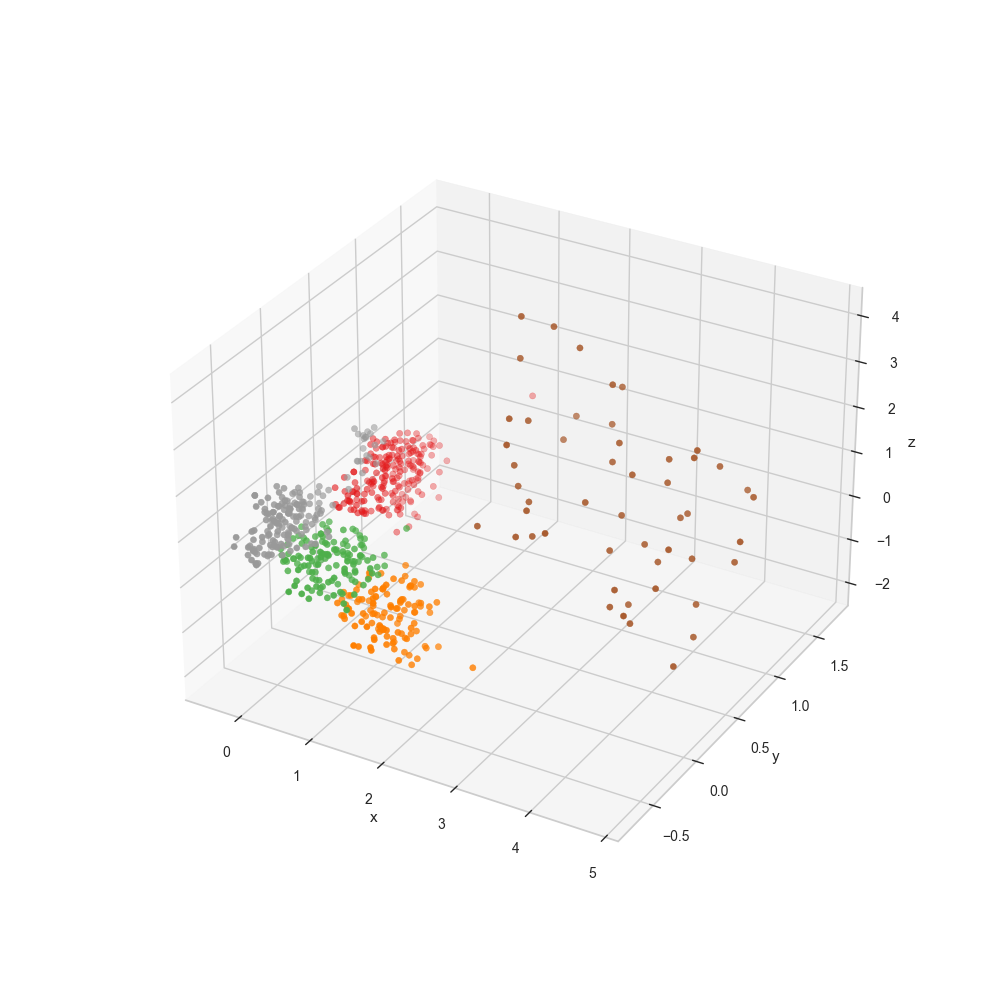

In [20]:
plt.ioff()
y_km_5 = km_5.predict(df_reduced_3d)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111, projection = '3d')

x = df_reduced_3d[:, 0]
y = df_reduced_3d[:, 1]
z = df_reduced_3d[:, 2]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z, c = y_km_5, cmap = 'Set1')


plt.show()

### Evaluating $K$ choice

In [21]:
def get_scores_kmeans(data, fit, labels):

    output = {
        'inertia': fit.inertia_,
        'silhouette_score': silhouette_score(data, labels)
    }

    return output

In [22]:
{
    'K = 3': get_scores_kmeans(df_reduced_3d, km_3, y_km_3),
    'K = 4': get_scores_kmeans(df_reduced_3d, km_4, y_km_4),
    'K = 5': get_scores_kmeans(df_reduced_3d, km_5, y_km_5)
}

{'K = 3': {'inertia': 671.8515902954255,
  'silhouette_score': 0.3564864583772251},
 'K = 4': {'inertia': 338.33995131049517,
  'silhouette_score': 0.44712583859293936},
 'K = 5': {'inertia': 292.3693045492916,
  'silhouette_score': 0.3944962377233599}}

#### Elbow method

In [23]:
plt.ioff()
model = KMeans(

    n_init = 'auto',
    random_state = 19
)
elbow_3 = KElbowVisualizer(model, k = (2, 10))
elbow_3.fit(df_reduced_3d)
elbow_3.show();

---

Fix the bug that does not show the correct plot.

### Silhouette visualizers

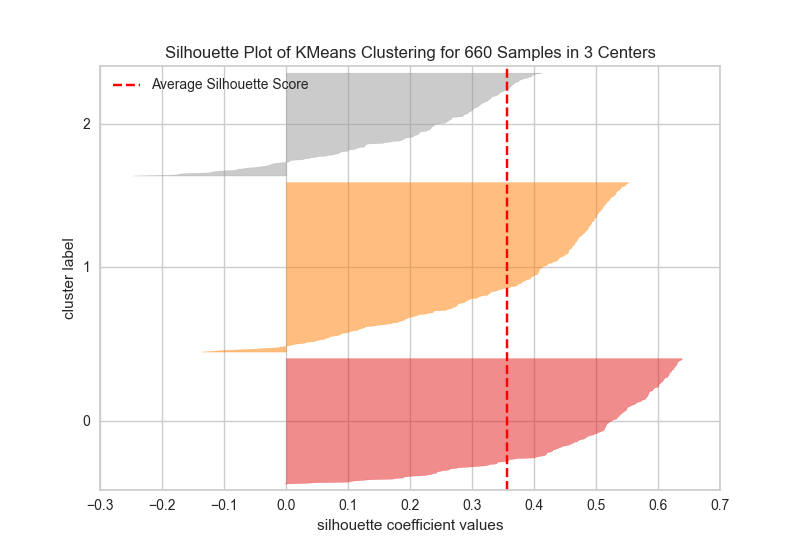

In [24]:
plt.ioff()
silhouette_k3 = SilhouetteVisualizer(km_3)
silhouette_k3.fit(df_reduced_3d)
silhouette_k3.show();

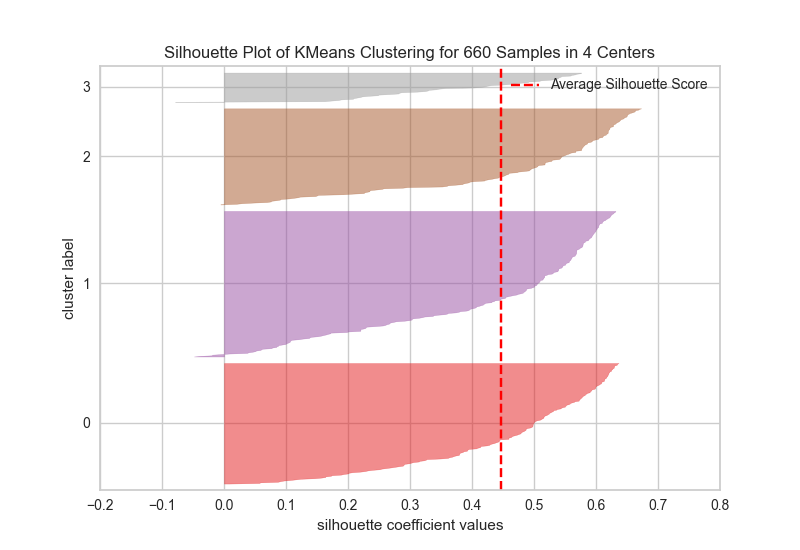

In [25]:
plt.ioff()
silhouette_k4 = SilhouetteVisualizer(km_4)
silhouette_k4.fit(df_reduced_3d)
silhouette_k4.show();

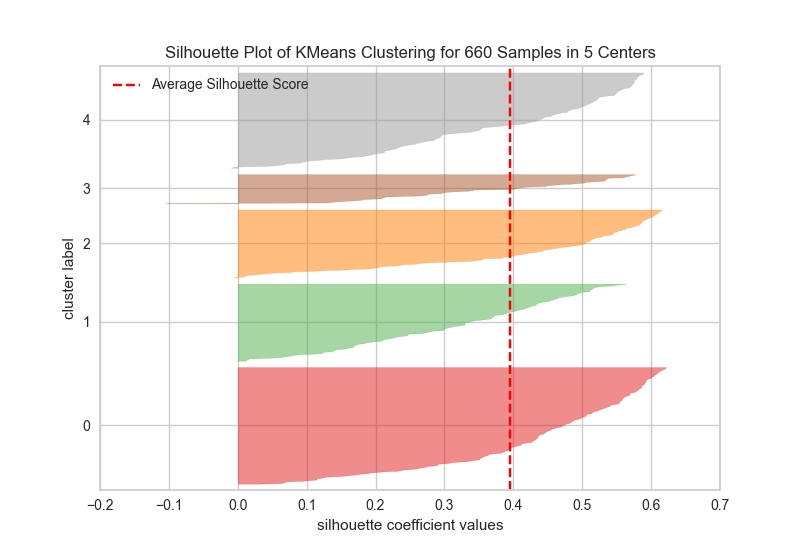

In [26]:
plt.ioff()
silhouette_k5 = SilhouetteVisualizer(km_5)
silhouette_k5.fit(df_reduced_3d)
silhouette_k5.show();

# Airline passengers

## Data cleaning and preparation

In [27]:
passengers_df = pd.concat(
    [
        pd.read_csv(
            data_path + "train.csv"
            ),
        pd.read_csv(
            data_path + "test.csv"
            )
    ],
    axis=0
    )

In [28]:
passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [29]:
passengers_df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  129880.000000  129880.000000  129880.000000    129880.000000   
mean    44158.700000   64940.500000      39.427957      1190.316392   
std     31207.377062   37493.270818      15.119360       997.452477   
min         0.000000       1.000000       7.000000        31.000000   
25%     16234.750000   32470.750000      27.000000       414.000000   
50%     38963.500000   64940.500000      40.000000       844.000000   
75%     71433.250000   97410.250000      51.000000      1744.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          129880.000000                      129880.000000   
mean                2.728696                           3.057599   
std                 1.329340                           1.526741   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           129880.000000  129880.000000   129880.000000    129880.000000   
mean                 2.756876       2.976925        3.204774         3.252633   
std                  1.401740       1.278520        1.329933         1.350719   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  129880.000000           129880.000000     129880.000000   
mean        3.441361                3.358077          3.383023   
std         1.319289                1.334049          1.287099   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     129880.000000     129880.000000    129880.000000     129880.000000   
mean           3.350878          3.632114         3.306267          3.642193   
std            1.316252          1.180025         1.266185          1.176669   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  129880.000000               129880.000000             129487.000000  
mean        3.286326                   14.713713                 15.091129  
std         1.313682                   38.071126                 38.465650  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

## Variables description

1. Categorical variables:
    - `Gender`: gender of the passengers (Female, Male)
    - `Customer Type`: The customer type (Loyal customer, disloyal customer)
    - `Type of Travel`: purpose of the flight of the passengers (Personal Travel, Business Travel)
    - `Class`: travel class in the plane of the passengers (Business, Eco, Eco Plus)
    - `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
2. Numerical variables:
    - `Age`: the actual age of the passengers
    - `Flight distance`: the flight distance of this journey
    - `Inflight wifi service`: satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
    - `Departure/Arrival time convenient`: satisfaction level of Departure/Arrival time convenient
    - `Ease of Online booking`: satisfaction level of online booking
    - `Gate location`: satisfaction level of Gate location
    - `Food and drink`: satisfaction level of Food and drink
    - `Online boarding`: satisfaction level of online boarding
    - `Seat comfort`: satisfaction level of Seat comfort
    - `Inflight entertainment`: satisfaction level of inflight entertainment
    - `On-board service`: satisfaction level of On-board service
    - `Leg room service`: satisfaction level of Leg room service
    - `Baggage handling`: satisfaction level of baggage handling
    - `Check-in service`: satisfaction level of Check-in service
    - `Inflight service`: satisfaction level of inflight service
    - `Cleanliness`: satisfaction level of Cleanliness
    - `Departure Delay in Minutes`: Minutes delayed when departure
    - `Arrival Delay in Minutes`: Minutes delayed when Arrival

### Data cleaning

1. Removing unnecessary variables.

In [30]:
passengers_df.drop(
    [
        "Unnamed: 0",
        "id"
    ],
    axis=1,
    inplace=True
)

2. Transforming categorical variables.



In [31]:
passengers_df = pd.get_dummies(
    passengers_df,
    dtype="float",
    prefix="",
    prefix_sep=""
)

In [32]:
passengers_df.head()

Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               5                3             5                       5  ...   
1               1                3             1                       1  ...   
2               5                5             5                       5  ...   
3               2                2             2                       2  ...   
4               4                5             5                       3  ...   

   Male  Loyal Customer  disloyal Customer  Business travel  Personal Travel  \
0   1.0             1.0                0.0              0.0              1.0   
1   1.0             0.0                1.0              1.0              0.0   
2   0.0             1.0                0.0              1.0              0.0   
3   0.0             1.0                0.0              1.0              0.0   
4   1.0             1.0                0.0              1.0              0.0   

   Business  Eco  Eco Plus  neutral or dissatisfied  satisfied  
0       0.0  0.0       1.0                      1.0        0.0  
1       1.0  0.0       0.0                      1.0        0.0  
2       1.0  0.0       0.0                      0.0        1.0  
3       1.0  0.0       0.0                      1.0        0.0  
4       1.0  0.0       0.0                      0.0        1.0  

[5 rows x 29 columns]

In [33]:
passengers_df.dropna(
    inplace= True
)

## PCA

In [34]:
passengers_2d = PCA(
    n_components=2,
)
passengers_2d.fit(passengers_df)

PCA(n_components=2)

In [35]:
passengers_2d.explained_variance_ratio_.sum()

0.9996964958811876

In [36]:
fig = px.scatter(df_reduced_2d[:, 0], y = df_reduced_2d[:, 1])
fig.show()

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


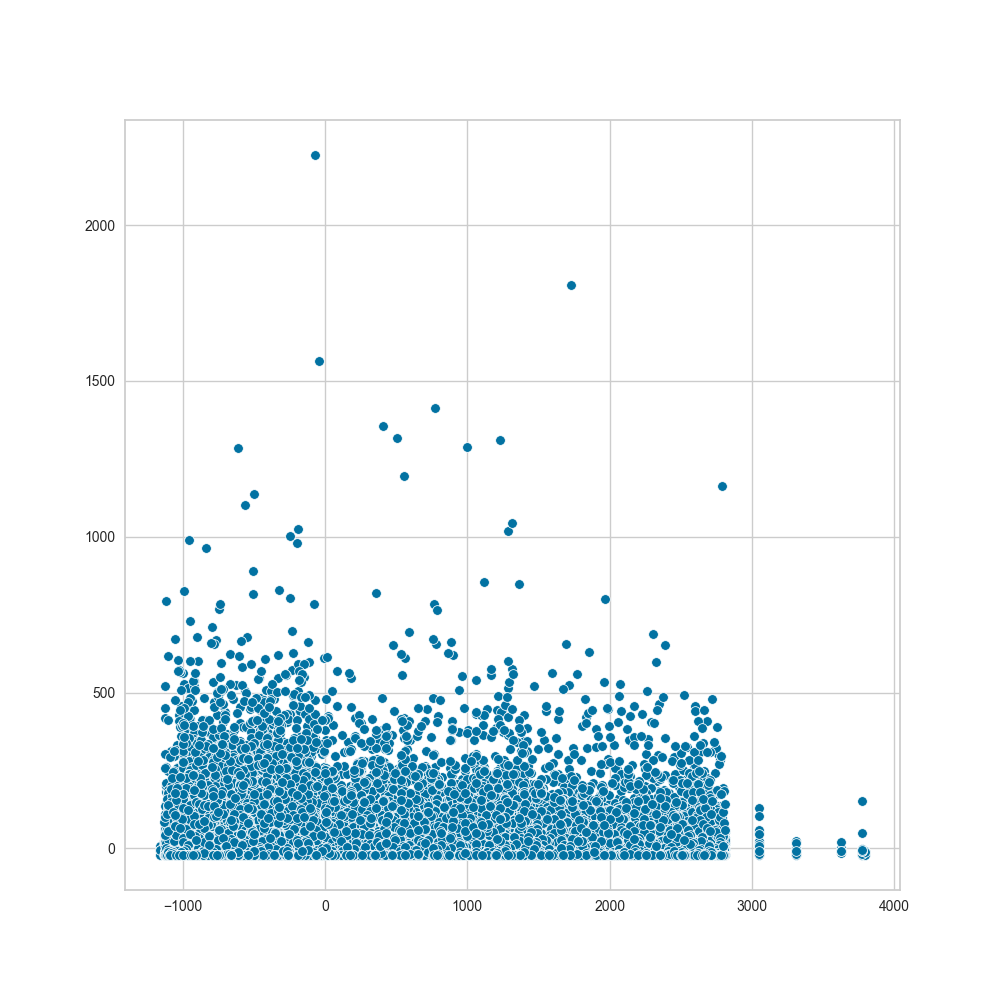

In [88]:
plt.ioff()
df_reduced_2d = passengers_2d.transform(passengers_df)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(x = df_reduced_2d[:, 0], y = df_reduced_2d[:, 1])
plt.show();

In [89]:
downsampling_idx = df_reduced_2d[np.random.choice(df_reduced_2d.shape[0], 1000, replace=False)]
fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(
    x = downsampling_idx[:, 0], 
    y = np.log(
        downsampling_idx[:, 1]
        )
    )
plt.show();

/var/folders/mm/nzts_rm10vzfv61dt475_5xh0000gp/T/ipykernel_3303/4059030727.py:9: RuntimeWarning: invalid value encountered in log
  y = np.log(
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


---

I am not sure that this visualization helps. Further down I will try and add colors corresponding to the clusters, to see if this is helpful or not.

## $K$-Means

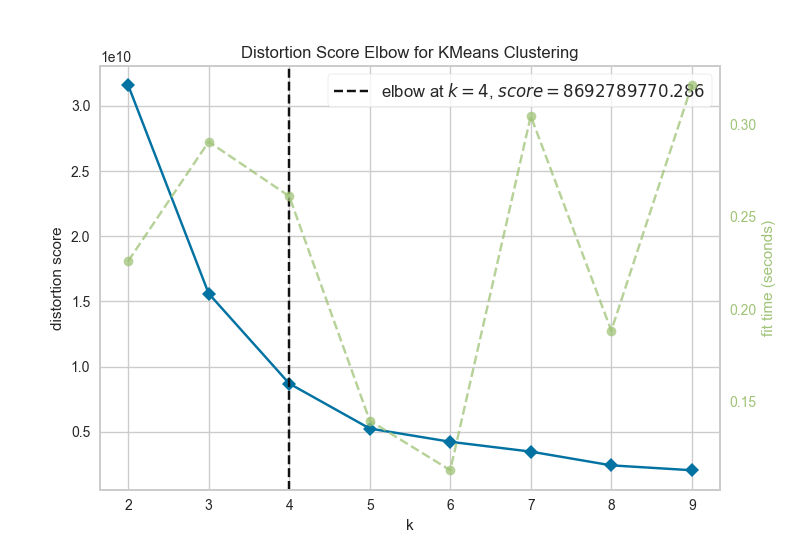

In [90]:
plt.ioff()
model = KMeans(

    n_init = 'auto',
    random_state = 19
)
elbow_3 = KElbowVisualizer(model, k = (2, 10))
elbow_3.fit(df_reduced_2d)
elbow_3.show();

## $K = 4$

In [91]:
km_4 = KMeans(
    n_clusters = 4,
    n_init = 'auto',
    random_state = 19
)

km_4.fit(
    df_reduced_2d,
)


KMeans(n_clusters=4, n_init='auto', random_state=19)

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

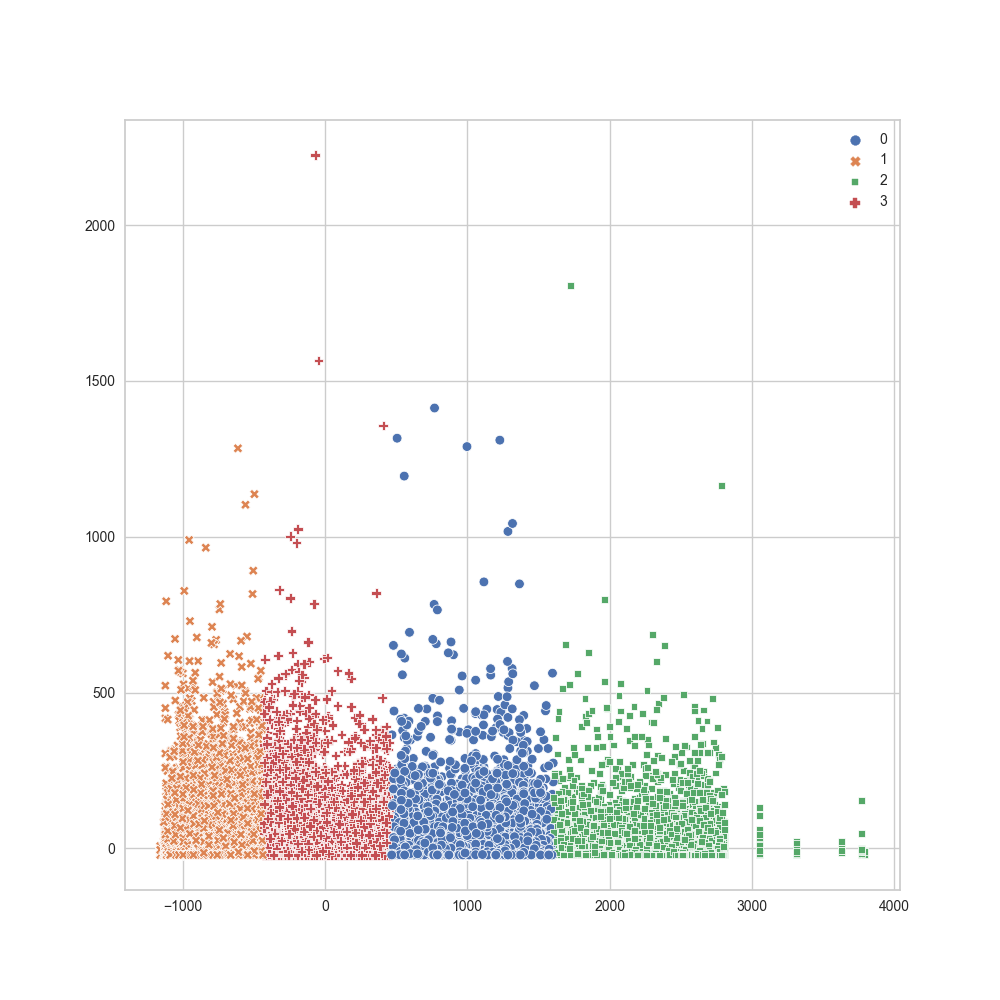

In [92]:
plt.ioff()
y_km_4 = km_4.predict(df_reduced_2d)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(x = df_reduced_2d[:, 0], y = df_reduced_2d[:, 1], hue=y_km_4,  style=y_km_4, palette="deep")
plt.show();

---

The clustering algo worked also in this situation with a good performance. Seems like if I follow the insight given by the _Elbow method_, it affects positively the computation time.

In [93]:
km_4 = KMeans(
    n_clusters = 4,
    n_init = 'auto',
    random_state = 19
)

%timeit km_4.fit(df_reduced_2d)

263 ms ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Further testing is needed on the whole processing chain. However, there is an important aspect left that needs more study to be understood. 

I need a way to visualize the clusters. This can be done easily since the output of the `predict` methods allows me to obtain a `Series` of labels. This means that I can use that information as a __grouping label__ and apply a `mean` method to the resulting group to obtain a syntethic rapresentation of the __KMC__ ($K$-th Mean Customer). I only need to:

- Create a df with the results and use that for the grouping variables.
- Create an array that contains both the resulting compressed data from the PCA 2D and the corresponding labels; _then_ I can downsample the dataset and tranform it to better visualize the clusters. This ensures that all the labels and shapes fit together.

/var/folders/mm/nzts_rm10vzfv61dt475_5xh0000gp/T/ipykernel_3303/418485159.py:9: RuntimeWarning: invalid value encountered in log
  y = np.log(
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


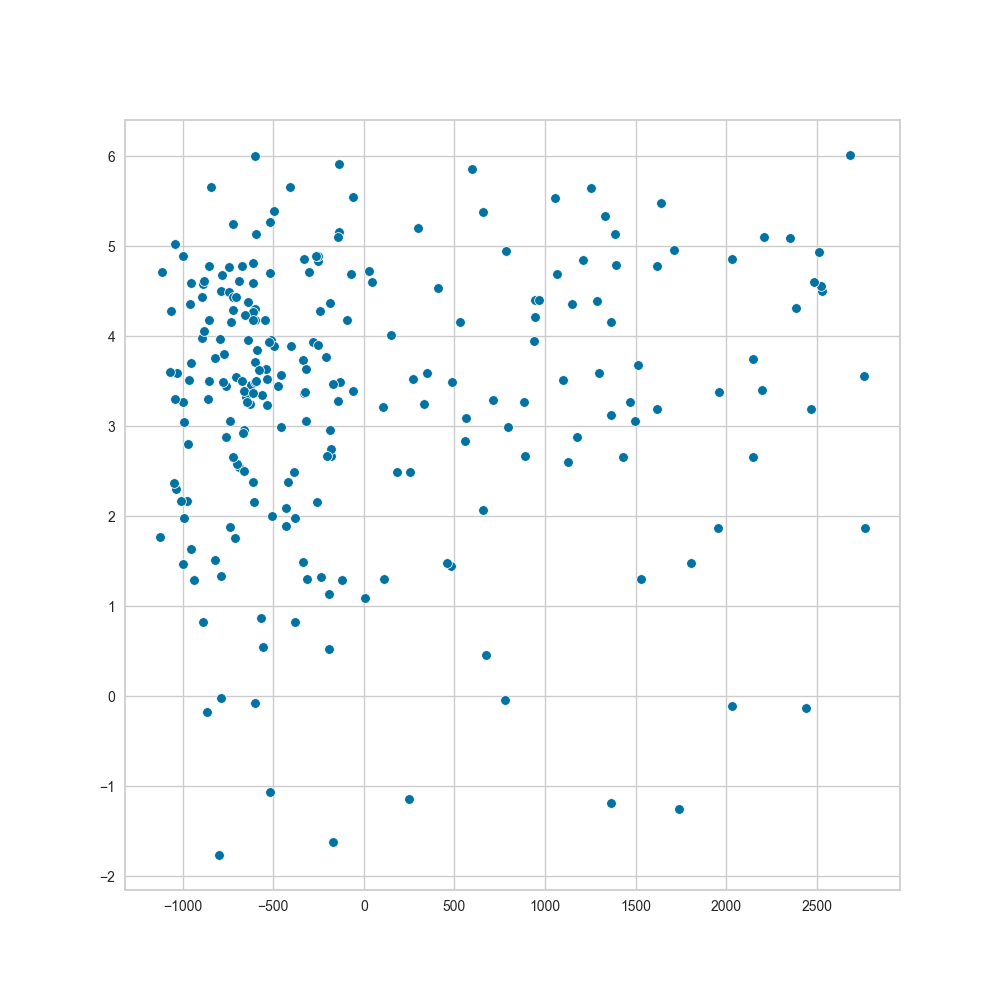

In [94]:


downsampling_idx = df_reduced_2d[np.random.choice(df_reduced_2d.shape[0], 1000, replace=False)]
fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(
    x = downsampling_idx[:, 0], 
    y = np.log(
        downsampling_idx[:, 1]
        )
    )
plt.show();

/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/themagician/py-venv/kaggle-venv/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

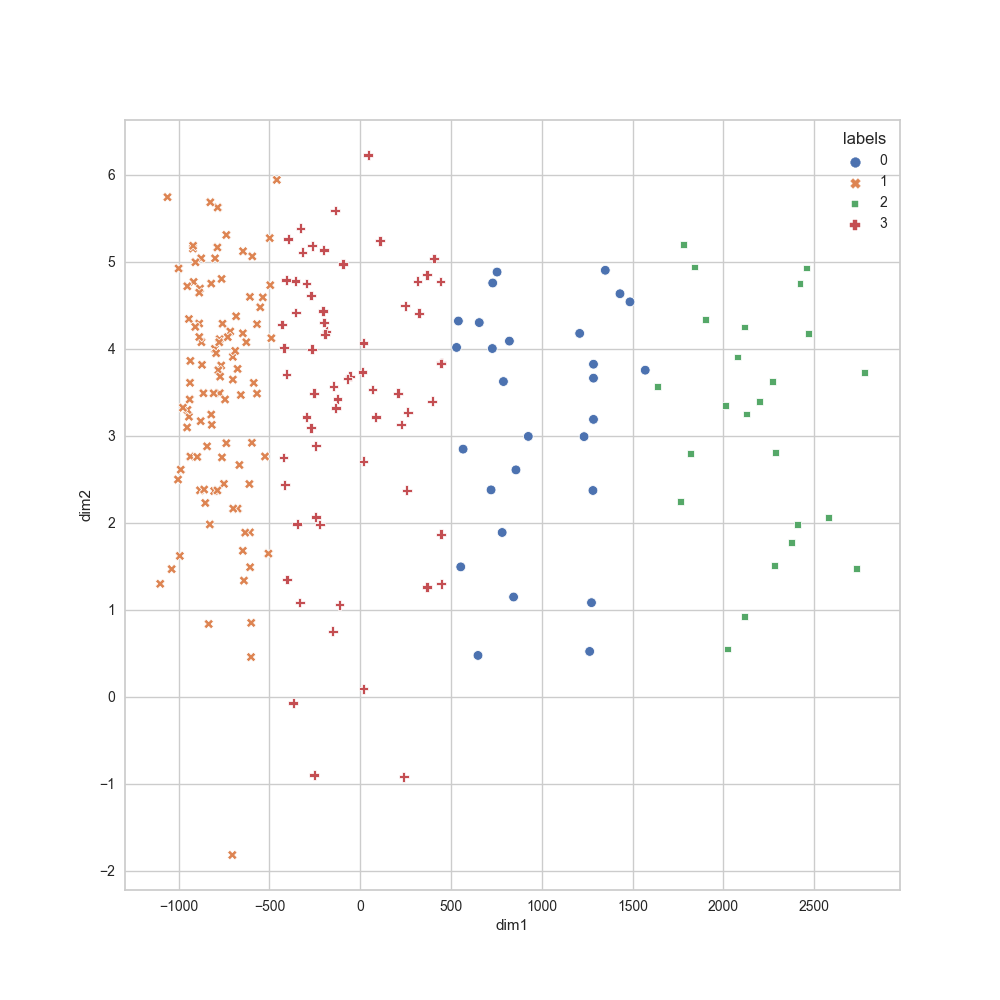

In [95]:
viz_df_2D = pd.DataFrame(
    {"dim1": df_reduced_2d[:, 0],
     "dim2": df_reduced_2d[:, 1],
     "labels": y_km_4
    }
)

downsampling_idx = viz_df_2D.sample(n = 1000, axis=0)

fig = plt.figure(
    figsize=(10, 10)
)
ax = fig.add_subplot(111)

sns.scatterplot(
    downsampling_idx, 
    x = downsampling_idx.dim1, 
    y = np.log(
        downsampling_idx.dim2
    ),
    hue = downsampling_idx.labels,
    style = downsampling_idx.labels,
    palette = "deep"
    )
plt.show();

# Code for the $K$-Mean Customer summary table

In [96]:
pd.concat([pd.DataFrame(passengers_2d.inverse_transform(df_reduced_2d)), pd.DataFrame({"labels":y_km_4})], axis=1).rename(columns = dict(enumerate(passengers_df.columns))).groupby("labels").mean()

Age  Flight Distance  Inflight wifi service  \
labels                                                      
0       40.938757      2186.041373               2.737587   
1       38.240405       404.542537               2.721806   
2       42.780382      3404.609068               2.747836   
3       39.306094      1111.221163               2.727440   

        Departure/Arrival time convenient  Ease of Online booking  \
labels                                                              
0                                3.028548                2.847814   
1                                3.080079                2.685123   
2                                2.993292                2.958885   
3                                3.059628                2.749416   

        Gate location  Food and drink  Online boarding  Seat comfort  \
labels                                                                 
0            2.983659        3.281163         3.543163      3.650022   
1            2.971453        3.145062         3.024078      3.277824   
2            2.992188        3.373272         3.897529      3.903675   
3            2.976501        3.197920         3.229190      3.424392   

        Inflight entertainment  ...      Male  Loyal Customer  \
labels                          ...                             
0                     3.532487  ...  0.494488        0.904205   
1                     3.221133  ...  0.491073        0.747984   
2                     3.744525  ...  0.496850        1.011018   
3                     3.343571  ...  0.492458        0.809903   

        disloyal Customer  Business travel  Personal Travel  Business  \
labels                                                                  
0                0.095795         0.813940         0.186060  0.711620   
1                0.252016         0.593535         0.406465  0.295112   
2               -0.011018         0.964767         0.035233  0.996362   
3                0.190097         0.681042         0.318958  0.460153   

             Eco  Eco Plus  neutral or dissatisfied  satisfied  
labels                                                          
0       0.248126  0.040254                 0.417521   0.582479  
1       0.607074  0.097814                 0.681772   0.318228  
2       0.002730  0.000908                 0.237428   0.762572  
3       0.464836  0.075011                 0.577705   0.422295  

[4 rows x 29 columns]

In [97]:
passengers_2d

PCA(n_components=2)

In [98]:
passengers_2d.inverse_transform(passengers_df.shape)

array([ 2.35344202e+02,  1.30677033e+05,  3.84721800e+00, -6.88566983e-01,
        1.45708324e+01,  3.87346303e+00,  1.30458416e+01,  4.09458909e+01,
        3.04459123e+01,  2.59401503e+01,  2.19416316e+01,  2.63464818e+01,
        1.35553051e+01,  1.53943958e+01,  1.26443516e+01,  1.95862678e+01,
        4.48086115e+01,  2.60835316e+01,  2.57858614e-01,  7.42141386e-01,
        1.21693798e+01, -1.11693798e+01,  1.67142304e+01, -1.57142304e+01,
        3.07442641e+01, -2.56343481e+01, -4.10991598e+00, -1.86071991e+01,
        1.96071991e+01])

In [99]:
pd.DataFrame({"labels":y_km_4})

labels
0            1
1            1
2            3
3            1
4            1
...        ...
129482       1
129483       1
129484       3
129485       3
129486       1

[129487 rows x 1 columns]

In [100]:
passengers_df.shape

(129487, 29)

In [101]:
passengers_2d.inverse_transform(df_reduced_2d).shape

(129487, 29)

In [102]:
dict(enumerate(passengers_df.columns))

{0: 'Age',
 1: 'Flight Distance',
 2: 'Inflight wifi service',
 3: 'Departure/Arrival time convenient',
 4: 'Ease of Online booking',
 5: 'Gate location',
 6: 'Food and drink',
 7: 'Online boarding',
 8: 'Seat comfort',
 9: 'Inflight entertainment',
 10: 'On-board service',
 11: 'Leg room service',
 12: 'Baggage handling',
 13: 'Checkin service',
 14: 'Inflight service',
 15: 'Cleanliness',
 16: 'Departure Delay in Minutes',
 17: 'Arrival Delay in Minutes',
 18: 'Female',
 19: 'Male',
 20: 'Loyal Customer',
 21: 'disloyal Customer',
 22: 'Business travel',
 23: 'Personal Travel',
 24: 'Business',
 25: 'Eco',
 26: 'Eco Plus',
 27: 'neutral or dissatisfied',
 28: 'satisfied'}

In [103]:
0.680471 + 0.319529

1.0